<a href="https://colab.research.google.com/github/dan032/ai-report/blob/main/AI_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
import pycaret as pc
import pandas as pd
from pycaret.classification import *
from pycaret.utils import enable_colab


     |████████████████████████████████| 288 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 34.8 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 15.5 MB 42.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 167 kB 56.8 MB/s 
     |████████████████████████████████| 113 kB 53.9 MB/s 
     |████████████████████████████████| 1.7 MB 41.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 51.2 MB/s 
     |████████████████████████████████| 261 kB 54.0 MB/s 
     |████████████████████████████████| 6.8 MB 37.8 MB/s 
     |████████████████████████████████| 62 kB 827 kB/s 
     |████████████████████████████████| 10.1 MB 50.5 MB/s 
     |████████████████████████████████| 303 kB 59.4 MB/s 
     |██████████████████

In [ ]:
def load_data():
  df = pd.read_csv(
      'https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data',
      names=[
             "bkblk","bknwy","bkon8","bkona","bkspr","bkxbq","bkxcr","bkxwp","blxwp","bxqsq","cntxt","dsopp","dwipd",
             "hdchk","katri","mulch","qxmsq","r2ar8","reskd","reskr","rimmx","rkxwp","rxmsq","simpl","skach","skewr",
             "skrxp","spcop","stlmt","thrsk","wkcti","wkna8","wknck","wkovl","wkpos","wtoeg","result"
         ]) 
  return df

dataset_orig = load_data()
print(dataset_orig.head())

  bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq cntxt dsopp  \
0     f     f     f     f     f     f     f     f     f     f     f     f   
1     f     f     f     f     t     f     f     f     f     f     f     f   
2     f     f     f     f     t     f     t     f     f     f     f     f   
3     f     f     f     f     f     f     f     f     t     f     f     f   
4     f     f     f     f     f     f     f     f     f     f     f     f   

  dwipd hdchk katri mulch qxmsq r2ar8 reskd reskr rimmx rkxwp rxmsq simpl  \
0     l     f     n     f     f     t     f     f     f     f     f     f   
1     l     f     n     f     f     t     f     f     f     f     f     f   
2     l     f     n     f     f     t     f     f     f     f     f     f   
3     l     f     n     f     f     t     f     f     f     t     f     f   
4     l     f     n     f     f     t     f     f     f     f     f     t   

  skach skewr skrxp spcop stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoeg 

In [ ]:
dataset = dataset_orig
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 37)
Unseen Data For Predictions: (320, 37)


In [ ]:
win = dataset[dataset['result'] == 'won']
nowin = dataset[dataset['result'] != 'won']
print(f'Number of entries with "win" class: {len(win)}')
print(f'Number of entries with "nowin" class: {len(nowin)}')

Number of entries with "win" class: 1669
Number of entries with "nowin" class: 1527


In [ ]:
exp_mclf101 = setup(data = data, target = 'result', session_id=123) 

,Description,Value
0,session_id,123
1,Target,result
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(2876, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9929,0.9962,0.9905,0.9933,0.9861,0.9861,0.019
lightgbm,Light Gradient Boosting Machine,0.9915,0.9996,0.9933,0.9904,0.9918,0.9831,0.9831,0.107
et,Extra Trees Classifier,0.9891,0.9975,0.9894,0.9895,0.9894,0.9781,0.9782,0.513
rf,Random Forest Classifier,0.9876,0.9982,0.9894,0.9866,0.9880,0.9751,0.9752,0.548
gbc,Gradient Boosting Classifier,0.9811,0.9981,0.9750,0.9884,0.9816,0.9622,0.9625,0.214
ada,Ada Boost Classifier,0.9662,0.9950,0.9711,0.9639,0.9674,0.9324,0.9327,0.146
lr,Logistic Regression,0.9593,0.9928,0.9634,0.9583,0.9607,0.9184,0.9187,0.346
svm,SVM - Linear Kernel,0.9553,0.0000,0.9471,0.9668,0.9560,0.9106,0.9122,0.021
knn,K Neighbors Classifier,0.9409,0.9793,0.9577,0.9303,0.9436,0.8815,0.8822,0.129
lda,Linear Discriminant Analysis,0.9359,0.9842,0.9596,0.9202,0.9393,0.8715,0.8727,0.028


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9901,0.9898,1.0000,0.9811,0.9905,0.9802,0.9804
2,0.9950,0.9949,1.0000,0.9905,0.9952,0.9901,0.9901
3,0.9801,0.9801,0.9808,0.9808,0.9808,0.9602,0.9602
4,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9900,0.9900,0.9904,0.9904,0.9904,0.9801,0.9801
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9950,0.9949,1.0000,0.9904,0.9952,0.9900,0.9901


In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9950,0.9999,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9901,0.9988,1.0000,0.9811,0.9905,0.9802,0.9804
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9900,0.9999,0.9904,0.9904,0.9904,0.9801,0.9801
4,0.9950,1.0000,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9751,0.9982,0.9712,0.9806,0.9758,0.9502,0.9503
6,0.9900,0.9997,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9900,0.9991,0.9904,0.9904,0.9904,0.9801,0.9801
8,0.9950,1.0000,0.9904,1.0000,0.9952,0.9900,0.9901
9,0.9950,1.0000,1.0000,0.9904,0.9952,0.9900,0.9901


In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9851,0.9995,0.9904,0.9810,0.9856,0.9703,0.9703
1,0.9851,0.9908,0.9904,0.9810,0.9856,0.9703,0.9703
2,0.9950,0.9998,0.9904,1.0000,0.9952,0.9901,0.9901
3,0.9801,0.9957,0.9712,0.9902,0.9806,0.9602,0.9604
4,0.9900,0.9995,1.0000,0.9811,0.9905,0.9801,0.9803
5,0.9851,0.9976,0.9712,1.0000,0.9854,0.9701,0.9706
6,0.9950,0.9994,1.0000,0.9905,0.9952,0.9900,0.9901
7,0.9851,0.9934,0.9808,0.9903,0.9855,0.9701,0.9702
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9900,0.9993,1.0000,0.9810,0.9904,0.9801,0.9803


In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9851,0.9993,0.9904,0.9810,0.9856,0.9703,0.9703
1,0.9802,0.9954,0.9808,0.9808,0.9808,0.9604,0.9604
2,0.9901,0.9999,0.9904,0.9904,0.9904,0.9802,0.9802
3,0.9851,0.9985,0.9808,0.9903,0.9855,0.9701,0.9702
4,0.9900,0.9999,1.0000,0.9811,0.9905,0.9801,0.9803
5,0.9801,0.9961,0.9712,0.9902,0.9806,0.9602,0.9604
6,0.9900,0.9992,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9851,0.9944,0.9904,0.9810,0.9856,0.9701,0.9702
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9900,0.9995,1.0000,0.9810,0.9904,0.9801,0.9803


In [ ]:
tuned_dt = tune_model(dt, n_iter=40, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9901,0.9999,0.9808,1.0000,0.9903,0.9802,0.9804
1,0.9752,0.9988,0.9712,0.9806,0.9758,0.9505,0.9505
2,0.9950,0.9999,0.9904,1.0000,0.9952,0.9901,0.9901
3,0.9851,0.9948,0.9808,0.9903,0.9855,0.9701,0.9702
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9801,0.9947,0.9808,0.9808,0.9808,0.9602,0.9602
6,0.9851,0.9950,0.9904,0.9810,0.9856,0.9701,0.9702
7,0.9701,0.9886,0.9808,0.9623,0.9714,0.9402,0.9404
8,0.9950,0.9998,1.0000,0.9905,0.9952,0.9900,0.9901
9,0.9751,0.9894,0.9709,0.9804,0.9756,0.9502,0.9503


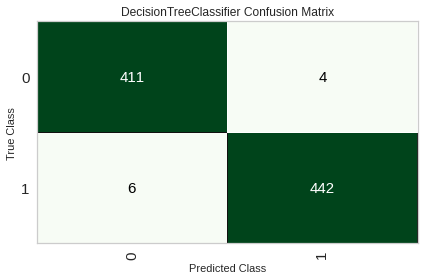

In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=40, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9950,0.9996,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9851,0.9971,0.9808,0.9903,0.9855,0.9703,0.9703
2,0.9851,0.9994,0.9712,1.0000,0.9854,0.9703,0.9707
3,0.9900,0.9990,0.9904,0.9904,0.9904,0.9801,0.9801
4,0.9900,0.9998,1.0000,0.9811,0.9905,0.9801,0.9803
5,0.9851,0.9940,0.9808,0.9903,0.9855,0.9701,0.9702
6,0.9851,0.9995,0.9904,0.9810,0.9856,0.9701,0.9702
7,0.9801,0.9988,0.9904,0.9717,0.9810,0.9601,0.9603
8,0.9851,0.9998,0.9904,0.9810,0.9856,0.9701,0.9702
9,0.9950,0.9995,1.0000,0.9904,0.9952,0.9900,0.9901


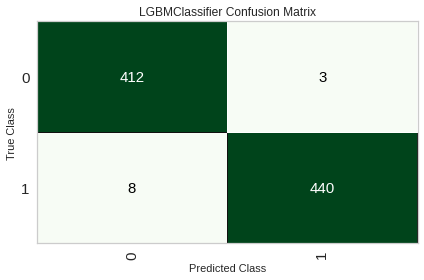

In [ ]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
tuned_et= tune_model(et, n_iter=40, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9950,0.9998,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9851,0.9964,0.9904,0.9810,0.9856,0.9703,0.9703
2,0.9901,0.9966,0.9904,0.9904,0.9904,0.9802,0.9802
3,0.9900,0.9923,0.9904,0.9904,0.9904,0.9801,0.9801
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9851,0.9928,0.9904,0.9810,0.9856,0.9701,0.9702
6,0.9900,0.9996,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9851,0.9944,0.9904,0.9810,0.9856,0.9701,0.9702
8,0.9950,0.9999,1.0000,0.9905,0.9952,0.9900,0.9901
9,0.9950,0.9922,1.0000,0.9904,0.9952,0.9900,0.9901


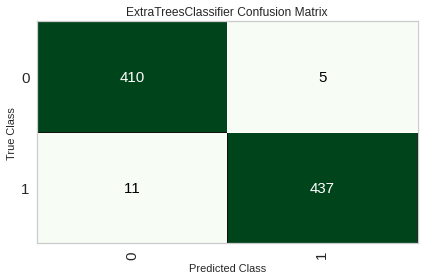

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [ ]:
tuned_rf = tune_model(rf, n_iter=40, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9950,0.9998,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9851,0.9964,0.9904,0.9810,0.9856,0.9703,0.9703
2,0.9901,0.9966,0.9904,0.9904,0.9904,0.9802,0.9802
3,0.9900,0.9923,0.9904,0.9904,0.9904,0.9801,0.9801
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9851,0.9928,0.9904,0.9810,0.9856,0.9701,0.9702
6,0.9900,0.9996,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9851,0.9944,0.9904,0.9810,0.9856,0.9701,0.9702
8,0.9950,0.9999,1.0000,0.9905,0.9952,0.9900,0.9901
9,0.9950,0.9922,1.0000,0.9904,0.9952,0.9900,0.9901


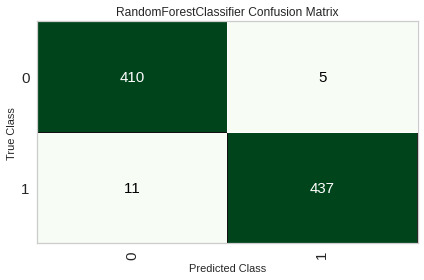

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9884,0.9885,0.9866,0.991,0.9888,0.9768,0.9768


In [ ]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9873,0.9997,0.9821,0.9932,0.9877,0.9745,0.9745


In [ ]:
predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9815,0.9953,0.9754,0.9887,0.982,0.9629,0.963


In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9815,0.9953,0.9754,0.9887,0.982,0.9629,0.963


In [ ]:
final_dt = finalize_model(tuned_dt)

In [ ]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,result,Label,Score
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,won,won,1.0
1,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won,won,1.0
2,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,t,f,t,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won,won,1.0
3,f,f,f,f,t,f,t,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,1.0
4,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,1.0


In [ ]:
tmp = unseen_predictions[unseen_predictions['Score'] == 1]
print(f"Percentage of entries with a score of 1: {len(tmp)/len(data_unseen) * 100:.0f}%")

Percentage of entries with a score of 1: 100%
